In [1]:
import numpy as np
import os
import csv
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import math
from datetime import datetime
import tracker_helpers as tracker

In [2]:
source = os.path.join('results', 'tracker_2018-08-18_ssd_mobilenet_v2_coco__complex_feature_matching_3')
verbose = True

In [3]:
# Loop through tests, loading results into lists of dictionaries
tests = ['test1', 'test2', 'test3', 'test4']
tests_short = ['Test 1', 'Test 2', 'Test 3', 'Test 4']

detection_models = ['ssd_mobilenet_v2_coco']

detection_models_short = ['ssd_mobilenet_v2']

odms = ['OD1']

association_models = ['complex_feature_matching']

oams = ['OA2']

comb = ['OD1+OA2']

head = ['frame',
       'ID',
       'left',
       'top',
       'width',
       'height',
       'conf',
       'trajectory',
       'duration',
       'x',
       'y',
       'dx',
       'dy',
       'dx_acc',
       'dy_acc',
       'distance',
       'distance_acc',
       'direction',
       'x_av',
       'y_av',
       'direction_av',
       'year',
       'month',
       'day']

In [4]:
# test extract results
bad_days = ['2015-10-28.npy',
            '2015-10-29.npy',
            '2015-10-30.npy',
            '2015-10-31.npy',
            '2015-11-01.npy',
            '2015-11-02.npy',
            '2015-11-03.npy',
            '2015-11-04.npy',
            '2015-12-04.npy',
            '2015-12-05.npy',
            '2015-12-06.npy',
            '2015-12-07.npy',
            '2015-12-08.npy',
            '2015-12-09.npy',
            '2015-12-10.npy',
            '2016-02-08.npy'
           ]
results_paths = os.listdir(source)
results_paths = sorted([path for path in results_paths if (path[0] is not 'p') and (path[-1:] is not 't') and (path not in bad_days)])
print('{} days:'.format(len(results_paths)))
results_paths

31 days:


['2015-11-05.npy',
 '2015-11-06.npy',
 '2015-11-07.npy',
 '2015-11-08.npy',
 '2015-11-09.npy',
 '2015-11-10.npy',
 '2015-11-11.npy',
 '2015-11-12.npy',
 '2015-11-13.npy',
 '2015-11-14.npy',
 '2015-11-15.npy',
 '2015-11-16.npy',
 '2015-11-17.npy',
 '2015-11-18.npy',
 '2015-11-19.npy',
 '2015-11-20.npy',
 '2015-11-21.npy',
 '2015-11-22.npy',
 '2015-11-23.npy',
 '2015-11-24.npy',
 '2015-11-25.npy',
 '2015-11-26.npy',
 '2015-11-27.npy',
 '2015-11-28.npy',
 '2015-11-29.npy',
 '2015-11-30.npy',
 '2015-12-01.npy',
 '2015-12-11.npy',
 '2015-12-12.npy',
 '2015-12-13.npy',
 '2015-12-14.npy']

In [5]:
results = {}
unique_results = {}
trajectory_dicts = {}
start_id = 0
for path in results_paths[5:]:
    raw_result = np.load(os.path.join(source, path))
    if verbose:
        print('\n\t {} \t> {} detections'.format(path, len(raw_result)))
    date = datetime.strptime(path[:10], '%Y-%m-%d')
    
    analysis, start_id = tracker.get_analysis(raw_result, start_id, date)
    uniques = tracker.get_ID_aggregation(analysis)
    trajectories = tracker.get_trajectory_dict(uniques, analysis)
    
    results[date] = analysis
    unique_results[date] = uniques
    trajectory_dicts[date] = trajectories
    


	 2015-11-10.npy 	> 3029 detections
Created results analysis array with shape: (3029, 24)
Created unique ids array with shape: (1257, 24)
Created unique trajectories dict of length 1257

	 2015-11-11.npy 	> 6898 detections
Created results analysis array with shape: (6898, 24)
Created unique ids array with shape: (1986, 24)
Created unique trajectories dict of length 1986

	 2015-11-12.npy 	> 5083 detections
Created results analysis array with shape: (5083, 24)
Created unique ids array with shape: (1675, 24)
Created unique trajectories dict of length 1675

	 2015-11-13.npy 	> 4589 detections
Created results analysis array with shape: (4589, 24)
Created unique ids array with shape: (1606, 24)
Created unique trajectories dict of length 1606

	 2015-11-14.npy 	> 1429 detections
Created results analysis array with shape: (1429, 24)
Created unique ids array with shape: (653, 24)
Created unique trajectories dict of length 653

	 2015-11-15.npy 	> 1892 detections
Created results analysis array

In [6]:
# Loop through all unique results concatenating arrays
all_unique_results = np.zeros((0, 24))
for date, result in unique_results.items():
    all_unique_results = np.concatenate((all_unique_results, result))
all_unique_results.shape

(38020, 24)

In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [8]:
#extract duration, dx_acc, dy_acc and distance_acc
X = all_unique_results[:,[8,13,14,16]]
len(X[X[:,1] != 0])
X[:3]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]])

In [9]:
mms = MinMaxScaler()
mms.fit(X)
X_norm = mms.transform(X)
X_norm[:3]

array([[0.        , 0.50312221, 0.50136737, 0.        ],
       [0.        , 0.50312221, 0.50136737, 0.        ],
       [0.        , 0.50312221, 0.50136737, 0.        ]])

In [10]:
ssd = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_norm)
    ssd.append(km.inertia_)

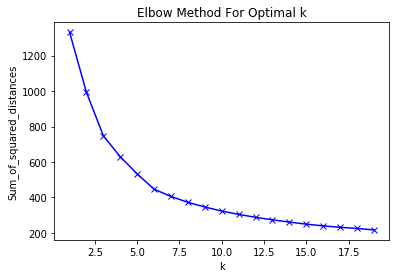

In [11]:
plt.plot(K, ssd, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [12]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_norm)
y_class = kmeans.fit_predict(X_norm)

In [13]:
y_class.shape

(38020,)

In [14]:
data_split = []
classes = np.unique(y_class)
for cl in classes:
    split = all_unique_results[y_class==cl]
    df = pd.DataFrame(split)
    df.columns = head
    print(df.describe())
    data_split.append(df)


              frame            ID         left          top        width  \
count   2363.000000   2363.000000  2363.000000  2363.000000  2363.000000   
mean   10519.217097  17870.052899   234.377909    99.752433   127.962759   
std     2741.532844  10547.740116   126.293868    68.727315    38.323221   
min        5.000000     60.000000     0.000000     0.000000    61.000000   
25%     8847.000000   8945.500000   142.000000    41.000000    99.000000   
50%    10392.000000  17472.000000   239.000000    87.000000   120.000000   
75%    12544.500000  26574.500000   323.000000   154.000000   152.000000   
max    16667.000000  37964.000000   548.000000   298.000000   302.000000   

            height         conf  trajectory     duration            x  \
count  2363.000000  2363.000000      2363.0  2363.000000  2363.000000   
mean    217.269573     0.849270         1.0     6.604317   298.359289   
std      55.651956     0.134848         0.0     5.088507   124.344399   
min      52.000000     

              frame            ID         left          top        width  \
count   3724.000000   3724.000000  3724.000000  3724.000000  3724.000000   
mean   10858.296992  20187.589420   406.292159    38.383996    95.777927   
std     2760.677924  11149.865744   106.647836    54.653429    35.637208   
min       10.000000     74.000000    11.000000     0.000000    27.000000   
25%     9005.000000  10832.000000   328.750000     0.000000    71.000000   
50%    10768.000000  21017.000000   426.000000     8.000000    87.000000   
75%    13129.750000  30158.250000   491.000000    58.000000   112.000000   
max    16624.000000  37994.000000   602.000000   269.000000   625.000000   

            height         conf  trajectory     duration            x  \
count  3724.000000  3724.000000      3724.0  3724.000000  3724.000000   
mean    180.447100     0.752769         1.0     7.039742   454.181122   
std      69.023998     0.150172         0.0     5.033386   103.223017   
min      48.000000     

In [15]:
colours = ['red', 'green', 'blue', 'orange', 'purple', 'yellow']
names = ['duration', 'distance_acc', 'dx_acc', 'dy_acc']

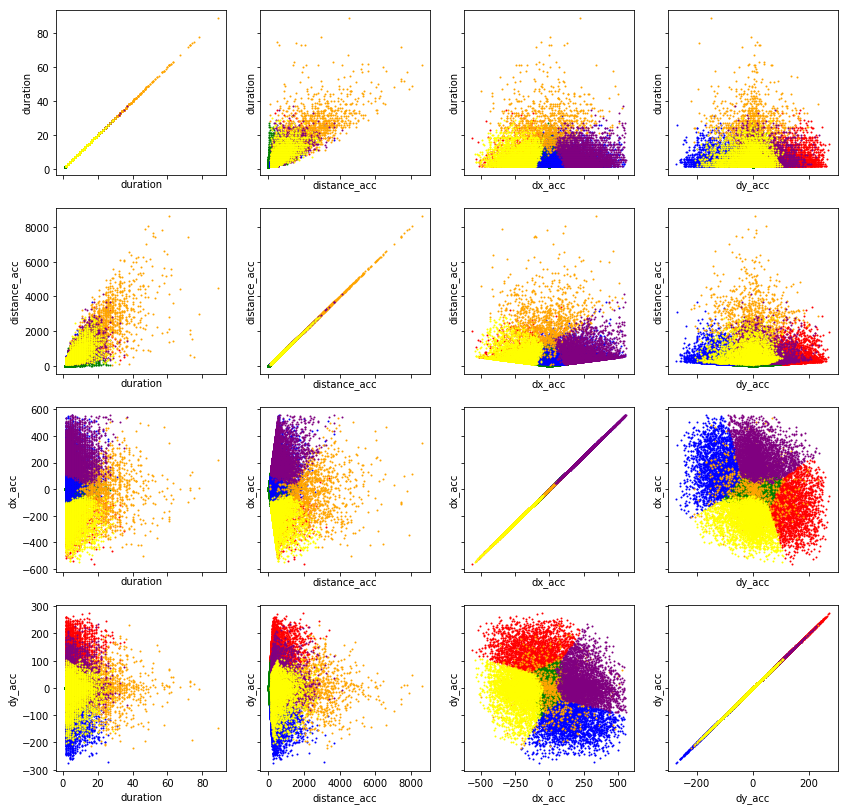

In [16]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14,14), sharex='col', sharey='row')
for row, y_name in enumerate(names):
    for col, x_name in enumerate(names):    
        for c, cl, df in zip(colours, classes, data_split):
            axes[row,col].scatter(df[x_name], df[y_name], c=c, s=1)
            axes[row,col].set_xlabel(x_name)
            axes[row,col].set_ylabel(y_name)
            

In [34]:
# add clusters back to analysis
results_clustered = np.zeros((0, 25))
for date, result in results.items():
    print('{} results from {}'.format(len(result), date))
    for line in result:
        ID = line[1]
        cluster = y_class[all_unique_results[:,1]==ID]
        new_line = np.concatenate((cluster, line))
        results_clustered = np.concatenate((results_clustered, [new_line]))
        

3029 results from 2015-11-10 00:00:00
6898 results from 2015-11-11 00:00:00
5083 results from 2015-11-12 00:00:00
4589 results from 2015-11-13 00:00:00
1429 results from 2015-11-14 00:00:00
1892 results from 2015-11-15 00:00:00
7634 results from 2015-11-16 00:00:00
7676 results from 2015-11-17 00:00:00
7913 results from 2015-11-18 00:00:00
8686 results from 2015-11-19 00:00:00
10209 results from 2015-11-20 00:00:00
61 results from 2015-11-21 00:00:00
374 results from 2015-11-22 00:00:00
1870 results from 2015-11-23 00:00:00
10621 results from 2015-11-24 00:00:00
6768 results from 2015-11-25 00:00:00
5987 results from 2015-11-26 00:00:00
6962 results from 2015-11-27 00:00:00
1001 results from 2015-11-28 00:00:00
2113 results from 2015-11-29 00:00:00
10627 results from 2015-11-30 00:00:00
3093 results from 2015-12-01 00:00:00
4823 results from 2015-12-11 00:00:00
3552 results from 2015-12-12 00:00:00
7187 results from 2015-12-13 00:00:00
7241 results from 2015-12-14 00:00:00


In [35]:
ID

38019.0

In [38]:
results_df = pd.DataFrame(results_clustered, columns=['cluster'] + head)
results_df.head(10)

,cluster,frame,ID,left,top,width,height,conf,trajectory,duration,...,dy_acc,distance,distance_acc,direction,x_av,y_av,direction_av,year,month,day
0,1.0,84.0,0.0,444.0,0.0,73.0,86.0,0.753155,0.0,1.0,...,0.0,0.0,0.0,0.0,480.5,43.0,0.0,2015.0,11.0,10.0
1,1.0,146.0,1.0,483.0,0.0,68.0,96.0,0.815997,0.0,1.0,...,0.0,0.0,0.0,0.0,517.0,48.0,0.0,2015.0,11.0,10.0
2,1.0,359.0,2.0,448.0,5.0,63.0,87.0,0.551369,0.0,1.0,...,0.0,0.0,0.0,0.0,479.5,48.5,0.0,2015.0,11.0,10.0
3,1.0,681.0,3.0,343.0,32.0,92.0,254.0,0.970837,0.0,1.0,...,0.0,0.0,0.0,0.0,389.0,159.0,0.0,2015.0,11.0,10.0
4,1.0,717.0,4.0,56.0,149.0,135.0,199.0,0.832889,0.0,1.0,...,0.0,0.0,0.0,0.0,123.5,248.5,0.0,2015.0,11.0,10.0
5,1.0,750.0,5.0,322.0,0.0,76.0,89.0,0.697789,0.0,1.0,...,0.0,0.0,0.0,0.0,360.0,44.5,0.0,2015.0,11.0,10.0
6,1.0,1198.0,6.0,426.0,0.0,64.0,117.0,0.807808,0.0,1.0,...,0.0,0.0,0.0,0.0,458.0,58.5,0.0,2015.0,11.0,10.0
7,1.0,1221.0,7.0,298.0,0.0,50.0,44.0,0.532871,0.0,1.0,...,0.0,0.0,0.0,0.0,323.0,22.0,0.0,2015.0,11.0,10.0
8,1.0,1276.0,8.0,0.0,0.0,99.0,271.0,0.542537,0.0,1.0,...,0.0,0.0,0.0,0.0,49.5,135.5,0.0,2015.0,11.0,10.0
9,1.0,1279.0,9.0,49.0,0.0,88.0,153.0,0.770008,0.0,1.0,...,0.0,0.0,0.0,0.0,93.0,76.5,0.0,2015.0,11.0,10.0


In [21]:
len(results_df)

137318

In [ ]:
# Create timeline results

timeline_tests_results = {}

for t, test in enumerate(tests):
    test_results = tests_results.get(test)
    
    gt_results = gts.get(test)
    realtime_actual = get_analysis(gt_results)
    
    gt_timeline_crowding = {}
    gt_timeline_dwelling = {}
    gt_timeline_distance = {}
        
    min_frame_counter = int(min(gt_results[:,0]))
    #frame_counter_max = max(max(results[:,0]), max(gt_results[:,0]))
    frame_counter = min_frame_counter
    frame_counter_max = frame_counter + 99
    
    timeline_models_results = {}
    
    while True:
        crowding_counter = 0
        dwelling_counter = 0
        distance_counter = 0
        for result in realtime_actual:
            if result[0] == frame_counter:
                crowding_counter += 1
                dwelling_counter += result[8]
                distance_counter += result[16]

        gt_timeline_crowding[frame_counter] = crowding_counter
        gt_timeline_dwelling[frame_counter] = dwelling_counter
        gt_timeline_distance[frame_counter] = distance_counter

        if frame_counter == frame_counter_max:
            break
        frame_counter += 1
            
    gt_timeline_results = {'Crowding': gt_timeline_crowding, 'Dwelling': gt_timeline_dwelling, 'Distance': gt_timeline_distance}
    timeline_models_results['Actual'] = gt_timeline_results
    
    for row, model in enumerate(comb):
           
        results = test_results.get(model)
        realtime_results = get_analysis(results)
        
        timeline_crowding = {}
        timeline_dwelling = {}
        timeline_distance = {}
        
        frame_counter = min_frame_counter
        
        while True:
            crowding_counter = 0
            dwelling_counter = 0
            distance_counter = 0
            for result in realtime_results:
                if result[0] == frame_counter:
                    crowding_counter += 1
                    dwelling_counter += result[8]
                    distance_counter += result[16]
                    
            timeline_crowding[frame_counter] = crowding_counter
            timeline_dwelling[frame_counter] = dwelling_counter
            timeline_distance[frame_counter] = distance_counter
            
            if frame_counter == frame_counter_max:
                break
            frame_counter += 1
            
        model_timeline_results = {'Crowding': timeline_crowding, 'Dwelling': timeline_dwelling, 'Distance': timeline_distance}
        timeline_models_results[model] = model_timeline_results
        
    timeline_tests_results[test] = timeline_models_results   
        